<a href="https://colab.research.google.com/github/nsvoriginals/Active-Online-Software-Page-React/blob/main/PROJECT_ALGORHYTYM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from collections import defaultdict
import difflib

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("data.csv")
genre_data = pd.read_csv('data_by_genres.csv')
year_data = pd.read_csv('data_by_year.csv')
artist_data = pd.read_csv('data_by_artist.csv')

In [ ]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4.0,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5.0,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5.0,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3.0,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2.0,1921,0.0380,101.665


In [ ]:
data['decade'] = data['year'].apply(lambda year : f'{(year//10)*10}s' )

In [ ]:
!pip install seaborn

<Axes: xlabel='decade', ylabel='count'>

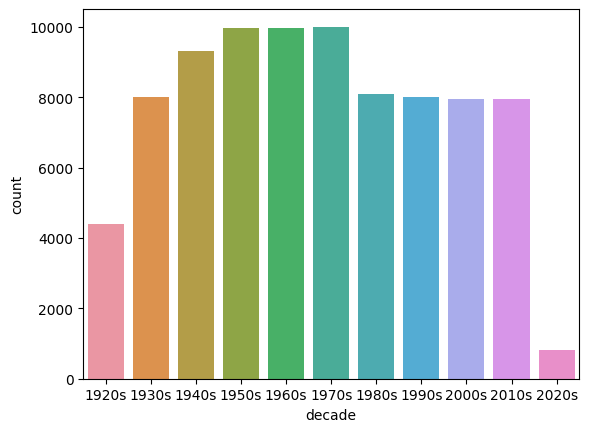

In [ ]:
sns.countplot(data=data, x='decade')

In [ ]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features,title='Trend of various sound features over decades')
fig.show()

In [ ]:
fig = px.line(year_data, x='year', y='loudness',title='Trend of loudness over decades')
fig.show()

In [ ]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group',
            title='Trend of various sound features over top 10 genres')
fig.show()

In [ ]:
!pip install wordcloud

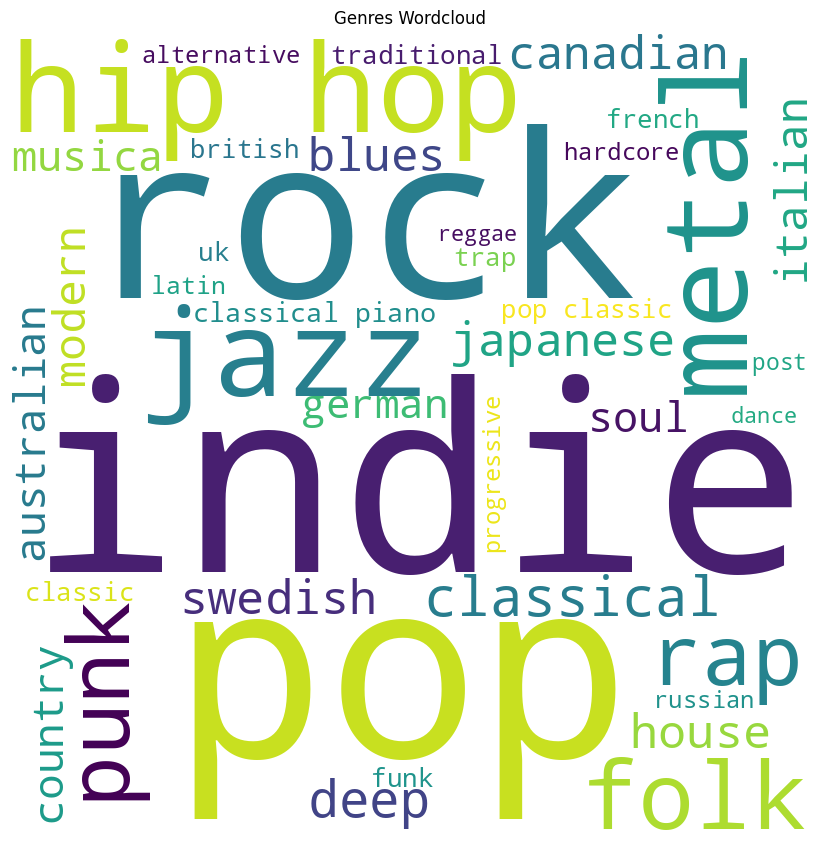

In [ ]:
from wordcloud import WordCloud,STOPWORDS

stopwords = set(STOPWORDS)
comment_words = " ".join(genre_data['genres'])+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                max_words=40,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Genres Wordcloud")
plt.show()

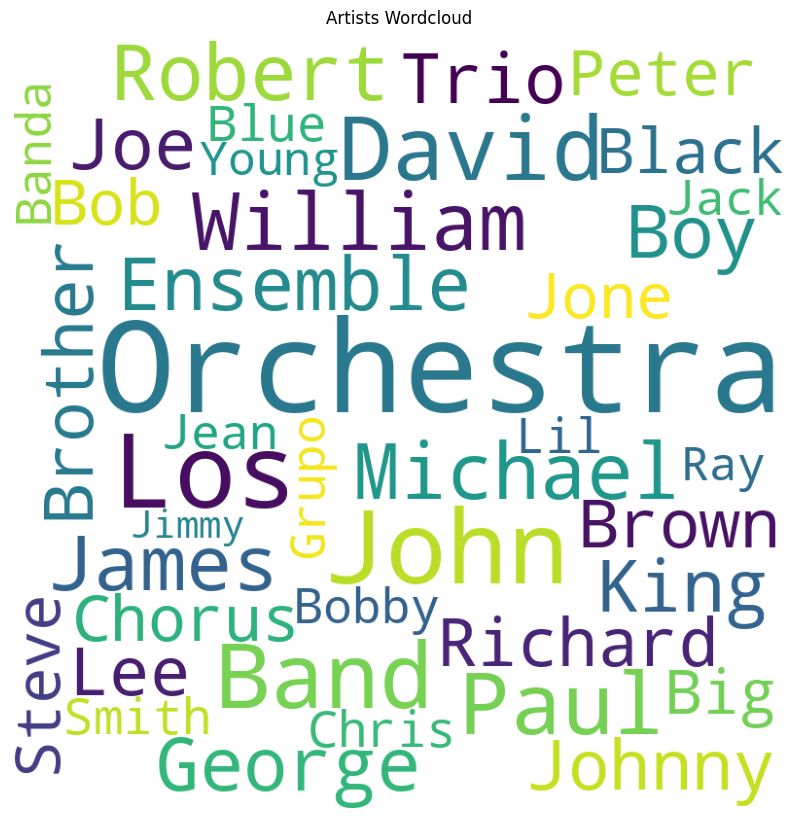

In [ ]:
stopwords = set(STOPWORDS)
comment_words = " ".join(artist_data['artists'])+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_word_length=3,
                max_words=40,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Artists Wordcloud")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
top10_popular_artists = artist_data.nlargest(10, 'popularity')
top10_most_song_produced_artists = artist_data.nlargest(10, 'count')

In [ ]:
print('Top 10 Artists that produced most songs:')
top10_most_song_produced_artists[['count','artists']].sort_values('count',ascending=False)

Top 10 Artists that produced most songs:


,count,artists
8367,3169,Francisco Canaro
28561,2422,Эрнест Хемингуэй
28560,2136,Эрих Мария Ремарк
8434,1459,Frank Sinatra
10714,1256,Ignacio Corsini
27109,1200,Vladimir Horowitz
1682,1146,Arturo Toscanini
2707,1103,Billie Holiday
12378,1061,Johnny Cash
7426,1023,Elvis Presley


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=12))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

In [ ]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X) # returns np-array of coordinates(x,y) for each record after TSNE.
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'],title='Clusters of genres')
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.013s...
[t-SNE] Computed neighbors for 2973 samples in 0.394s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.806447
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.738434
[t-SNE] KL divergence after 1000 iterations: 1.202140


In [ ]:
!pip install spotipy
!pip install kaggle


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict


CLIENT_ID = "587b803319f04132aa11ba6e9ed68e37"
CLIENT_SECRET = "84143c4cc79c43d8a2a7ef37ce20d854"

In [ ]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
                                                           client_secret=CLIENT_SECRET))


In [ ]:
def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)

In [ ]:
number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

In [ ]:
def get_song_data(song, spotify_data):
    # Assuming song is a dictionary with information like song name or ID
    song_name = song['name']

    # Assuming spotify_data is a DataFrame containing Spotify data
    song_data = spotify_data[spotify_data['name'] == song_name]

    if song_data.empty:
        return None  # Return None if song data is not found
    else:
        return song_data  # Return the song data DataFrame
def get_mean_vector(song_list, spotify_data):
    song_vectors = []
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)

    song_matrix = np.array(list(song_vectors))#nd-array where n is number of songs in list. It contains all numerical vals of songs in sep list.
    #print(f'song_matrix {song_matrix}')
    return np.mean(song_matrix, axis=0)

In [ ]:
def flatten_dict_list(dict_list):
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = [] # 'name', 'year'
    for dic in dict_list:
        for key,value in dic.items():
            flattened_dict[key].append(value) # creating list of values
    return flattened_dict

In [ ]:
from sklearn.preprocessing import StandardScaler

def recommend_songs( song_list, spotify_data, n_songs=10):

    metadata_cols = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    #print(f'song_center {song_center}')
    scaler = StandardScaler()
    scaler.fit(spotify_data[number_cols])

    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    #print(f'distances {distances}')
    index = list(np.argsort(distances)[:, :n_songs][0])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')






[{'name': 'Secrets', 'year': 2009, 'artists': "['OneRepublic']"},
 {'name': "They Don't Know About Us",
  'year': 2012,
  'artists': "['One Direction']"},
 {'name': 'Thunder', 'year': 2017, 'artists': "['Imagine Dragons']"},
 {'name': 'Forever After All', 'year': 2020, 'artists': "['Luke Combs']"},
 {'name': 'Getaway Car', 'year': 2017, 'artists': "['Taylor Swift']"},
 {'name': 'Fireflies', 'year': 2009, 'artists': "['Owl City']"},
 {'name': 'Black And White', 'year': 2020, 'artists': "['Niall Horan']"},
 {'name': 'Versace on the Floor', 'year': 2016, 'artists': "['Bruno Mars']"},
 {'name': 'Drunk Me', 'year': 2018, 'artists': "['Mitchell Tenpenny']"}]

In [ ]:
sname = input("ENTER YOUR FAVOURITE SONG:").title()
syear= int(input("ENTER THE YEAR OF THAT SONG"))
recommend_songs([{'name': sname, 'year': syear}],  data)

ENTER YOUR FAVOURITE SONG:thunders
ENTER THE YEAR OF THAT SONG2017


ValueError: ignored